## 1. Copy Activity
- we have data available in azure storage input container
- we have to copy this data to azure storage output container
- create pipeline which will transfer data from one container to another container

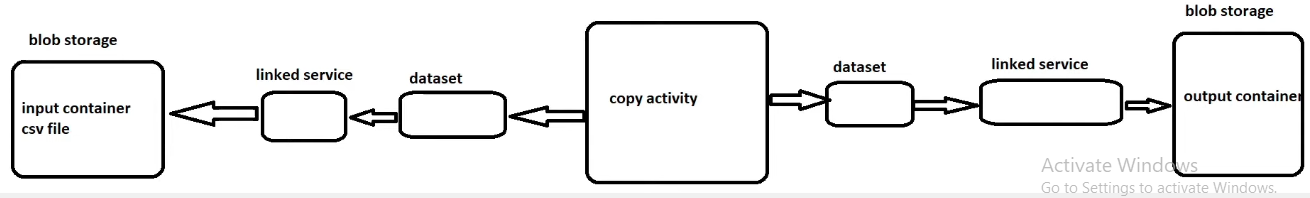

In [1]:
from IPython.display import Image
Image('./img/adf7.png')

🧩 Requirement Breakdown:

**Source:** Azure Blob Storage (Delimited Text File)  
**Sink (Target):** Azure Blob Storage (Delimited Text File)  

##### Step 1. Create Source Container and Upload File
1. Go to the **Azure Portal**.
2. Open your **Storage Account** (`covidreportingsa`) from the Dashboard or All Resources.
3. Navigate to `Storage browser` → `Blob containers`.
4. Click **+ Container**, name it `input`, and set access level to `Private`.
5. Click into the container `input` and click **Upload**.
6. Browse and upload the file `emp_1.csv`.
7. click on file --> edit --> preview

##### 2. Create Sink Container (Azure Data Lake)
1. Go back to Dashboard → Open your Data Lake Storage Account (`covidreportingdl`).
2. Navigate to `Storage browser` → `Blob containers`.
3. Click **+ Container**, name it `output`.
4. Set access level to `Private` and click **Create**.

##### 3. Create a New Pipeline
- Go to **Author** tab in ADF Studio.
- Click on the three dots next to Pipelines → **New Pipeline**.
- On the right, name your pipeline and provide an optional description.
- Set **Concurrency** to `1` (or more if parallel runs are needed).

##### 4. Add a Copy Data Activity
- Expand **Move & Transform** in the Activities pane.
- Drag **Copy data** to the central canvas.

4.1 General
- Select the activity to configure: 
- Name the activity (e.g., `CopyRawToLake`).
- Set timeout to `5 minutes`.
- Retry: `0` (or higher with interval).
- Secure Output/Input: Enable if sensitive data is involved.

4.2 Source Dataset (Blob Storage)
- Format: DelimitedText
- Name: `ds_input_data`
- Linked Service: `ls_ablob_inputdata`, select subscription, storage account name --> Test Connection
- File Path: `/input/emp_1.csv`
- First row as header: Enabled
- click on ok

> You can use "Preview Data" to confirm headers and schema.

4.3 Sink Dataset (blob storage)
- Format: DelimitedText
- Name: `ds_output_data`
- Linked Service: `ls_ablob_outdata` , select subscription, storage account name --> Test Connection
- File Path: `/output/
- First row as header: Enabled
- click on ok

##### 5: Validate and Publish
##### Validate Objects
Click on **Validate All** to check for issues in Linked Services or Datasets.

##### Publish Changes
Click on **Publish All** to save changes to the Data Factory.
Until you publish, your datasets and pipelines exist only temporarily in the UI.

<b>run pipeline : add trigger --> Trigger now</b>

## 2. Delete Activity
-  we have the data comming from other resource to one of the container and that data from input data container we want to delete on daily basis as we are copying into other location

##### 1. Create a New Pipeline
- Go to **Author** tab in ADF Studio.
- Click on the three dots next to Pipelines → **New Pipeline**.
- On the right, name your pipeline and provide an optional description.
- Set **Concurrency** to `1` (or more if parallel runs are needed).

##### 2. Add a Delete Activity(General)
- Expand **General** in the Activities pane.
- Drag **Delete** to the central canvas.

2.1 General
- Select the activity to configure: 
- Name the activity (e.g., `DeleteInputdata`).
- Set timeout to `5 minutes`.
- Retry: `0` (or higher with interval).
- Secure Output/Input: Enable if sensitive data is involved.

2.2 Source Dataset (Blob Storage)
- Format: DelimitedText
- Name: `ds_input_data`
- Linked Service: `ls_ablob_inputdata`, select subscription, storage account name --> Test Connection
- File Path: `/input/emp_1.csv`
- First row as header: Enabled
- click on ok

> You can use "Preview Data" to confirm headers and schema.

2.3 Logging Settings
- Enable Logging : Enabled
- Linked Service: `ls_ablob_inputdata` , select subscription, storage account name --> Test Connection
- Folder Path: `/input/`

> click on "Validate"

##### 5: Validate and Publish
##### Validate Objects
Click on **Validate All** to check for issues in Linked Services or Datasets.

##### Publish Changes
Click on **Publish All** to save changes to the Data Factory.
Until you publish, your datasets and pipelines exist only temporarily in the UI.

<b>run pipeline : add trigger --> Trigger now</b>

## 3. Copy Activity
- we have data available in azure blob storage as csv input container
- we need to copy this data from azure blob storage to azure sql database
- create pipeline which will transfer data from one place to another place

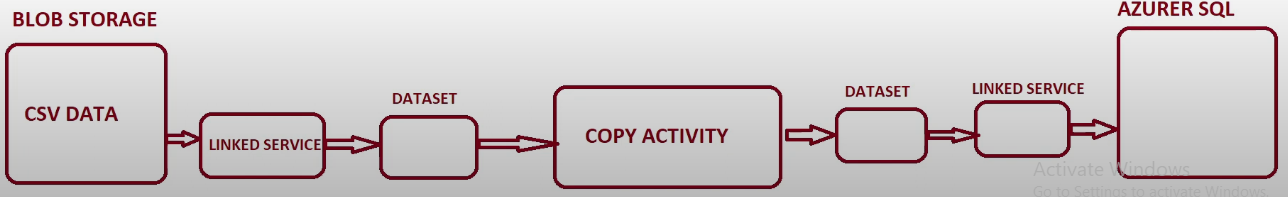

In [4]:
from IPython.display import Image
Image('./img/adf8.png')

##### 1. Create Source Container and Upload File
1. Go to the **Azure Portal**.
2. Open your **Storage Account** (`covidreportingsa`) from the Dashboard or All Resources.
3. Navigate to `Storage browser` → `Blob containers`.
4. Click **+ Container**, name it `input`, and set access level to `Private`.
5. Click into the container `input` and click **Upload**.
6. Browse and upload the file `emp_1.csv`.
7. click on file --> edit --> preview

##### 2. Create Sink(Azure Sql Database)
1. Go back to Dashboard → Open your sql database (`covidreportingdl`).
2. click on `Query Editor` and create a table `employee`

##### 3. Create a New Pipeline
- Go to **Author** tab in ADF Studio.
- Click on the three dots next to Pipelines → **New Pipeline**.
- On the right, name your pipeline and provide an optional description.
- Set **Concurrency** to `1` (or more if parallel runs are needed).

##### 4. Add a Copy Data Activity
- Expand **Move & Transform** in the Activities pane.
- Drag **Copy data** to the central canvas.

4.1 General
- Select the activity to configure: 
- Name the activity (e.g., `CopyRawToLake`).
- Set timeout to `5 minutes`.
- Retry: `0` (or higher with interval).
- Secure Output/Input: Enable if sensitive data is involved.

4.2 Source Dataset (Blob Storage)
- Format: DelimitedText
- Name: `ds_input_data`
- Linked Service: `ls_ablob_inputdata`, select subscription, storage account name --> Test Connection
- File Path: `/input/emp_1.csv`
- First row as header: Enabled
- click on ok

> You can use "Preview Data" to confirm headers and schema.

4.3 Sink Dataset (Azure Sql Database)
- Format: DelimitedText
- Name: `sd_output_data`
- Linked Service: `ls_sql_outdata` , select subscription, server name, Database name, Authentication type: SQL Authentication, Username, password --> Test Connection --> click on `create`
- Table name : `dbo.employee`
- click on ok

##### 5: Validate and Publish
##### Validate Objects
Click on **Validate All** to check for issues in Linked Services or Datasets.

##### Publish Changes
Click on **Publish All** to save changes to the Data Factory.
Until you publish, your datasets and pipelines exist only temporarily in the UI.

<b>run pipeline : add trigger --> Trigger now</b> 

## triggers
- ⏰ Schedule triggers automate pipeline runs at set intervals like hourly, daily, or weekly.
- 🔄 Tumbling window triggers support both current and historical data execution with defined window sizes.
- 📂 Event triggers execute pipelines based on events such as file uploads, updates, or deletions in blob storage.
- 🖱️ Manual triggers enable on-demand pipeline execution through user initiation.
- 
🎯 Triggers eliminate the need for manual pipeline execution, enhancing automation and efficiency.

- ⏳ Automation through Scheduling Enhances Efficiency: Schedule triggers allow pipelines to run automatically at specified intervals without human intervention. This is instrumental in scenarios where data processing needs to occur consistently, such as daily data ingestion or hourly reporting. Automating these workflows reduces operational overhead and minimizes the risk of missing critical data updates.
- 📆 Tumbling Window Triggers Enable Reliable Backfill Processing: Unlike schedule triggers, tumbling window triggers provide the ability to process data for past time periods through their window size and offset parameters. This capability is essential when dealing with historical data or recovering from failures, ensuring that no data segment is skipped and pipelines can be executed reliably for retrospective data.
- 🔔 Event Triggers Facilitate Reactive Data Workflows: Event triggers introduce real-time responsiveness to pipeline executions by listening to external events, such as file operations in blob storage. This makes data pipelines reactive rather than purely time-based, enabling immediate processing upon data arrival or modification, which is critical for scenarios requiring low latency or event-driven architectures.
- 🖱️ Manual Triggers Provide Controlled Pipeline Execution: Manual triggers serve as a fallback or control mechanism where pipeline runs are initiated by users. This is useful during testing, debugging, or when pipeline execution depends on human validation or decision-making, offering flexibility in managing data workflows.
- 📊 Choosing the Right Trigger Depends on Use Case Requirements: The selection among schedule, tumbling window, event, and manual triggers depends on the nature of the data flow and business needs. For example, batch processing fits schedule triggers, while event-driven data ingestion fits event triggers. Understanding these distinctions aids in designing efficient and effective data workflows.
    
🧩 Triggers Integrate Seamlessly with Pipeline Activities: Triggers serve as the starting mechanism for pipelines and are tightly coupled with pipeline activities such as copy data tasks. This integration ensures that complex data operations can be orchestrated automatically, improving the overall data engineering lifecycle from ingestion to transformation.

## 4.Schedule trigger
<b>run pipeline : add trigger --> New/Edit</b> 
- click on `new`
- Name : `St_trigger`
- Type : Schedule
- StartDate :
- Time Zone : kolkata
- Recurrence : 2 Minutes
- End on :
- Start trigger on creation : Enable
- click on ok and publish all

## 5. Event based trigger
- Requirement : We have data coming from the external resources in csv format. If any new file is getting uploaded in storage accounts, then our pipeline should trigger. Pipeline should be able to copy data from one container to another as a JSON format.

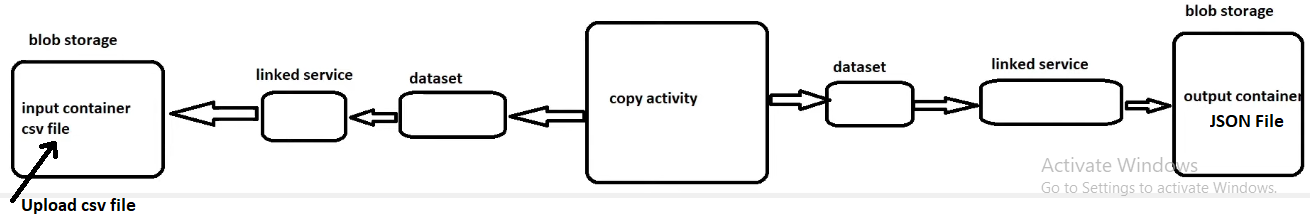

In [7]:
from IPython.display import Image
Image('./img/adf9.png')

##### Step 1. Create Source Container and Upload File
1. Go to the **Azure Portal**.
2. Open your **Storage Account** (`covidreportingsa`) from the Dashboard or All Resources.
3. Navigate to `Storage browser` → `Blob containers`.
4. Click **+ Container**, name it `inputcsv`, and set access level to `Private`.
5. Click into the container `inputcsv` and click **Upload**.
6. Browse and upload the file `emp_1.csv`.
7. click on file --> edit --> preview

##### 2. Create Sink Container (blob storage)
1. Go back to Dashboard → Open your Data Lake Storage Account (`covidreportingdl`).
2. Navigate to `Storage browser` → `Blob containers`.
3. Click **+ Container**, name it `outputjson`.
4. Set access level to `Private` and click **Create**.

##### 3. Create a New Pipeline
- Go to **Author** tab in ADF Studio.
- Click on the three dots next to Pipelines → **New Pipeline**.
- On the right, name your pipeline and provide an optional description.
- Set **Concurrency** to `1` (or more if parallel runs are needed).

##### 4. Add a Copy Data Activity
- Expand **Move & Transform** in the Activities pane.
- Drag **Copy data** to the central canvas.

4.1 General
- Select the activity to configure: 
- Name the activity (e.g., `CopyRawToLake`).
- Set timeout to `5 minutes`.
- Retry: `0` (or higher with interval).
- Secure Output/Input: Enable if sensitive data is involved.

4.2 Source Dataset (Blob Storage)
- Format: DelimitedText
- Name: `ds_input_data`
- Linked Service: `ls_ablob_inputdata`, select subscription, storage account name --> Test Connection
- File Path: `/inputcsv`
- First row as header: Enabled
- click on ok

> File path type : Wildcard file path, Wildcard paths : inputcsv/*.csv

4.3 Sink Dataset (blob storage)
- Format: DelimitedText
- Name: `ds_output_data`
- Linked Service: `ls_ablob_outdata` , select subscription, storage account name --> Test Connection
- File Path: `/outputjson/
- First row as header: Enabled
- click on ok

##### 5. pipeline : add trigger --> New/Edit
- click on `new`
- Name : `Et_trigger`
- Type : Storage Events
- Azure Subscription :
- Storage Account name :
- container name : inputcsv
- Event : Blob created 
- click on ok
  
##### 5: Validate and Publish
##### Validate Objects
Click on **Validate All** to check for issues in Linked Services or Datasets.

##### Publish Changes
Click on **Publish All** to save changes to the Data Factory.
Until you publish, your datasets and pipelines exist only temporarily in the UI.

<b>run pipeline : upload the csv file into the input container</b>

## 6.Tumbling Window Trigger

## 7. Data Flow(transformation)

- Requirement:  we have data available in SQL database and we want to transfer data in blob storage but with filter conditions and data should be available in sorted way.

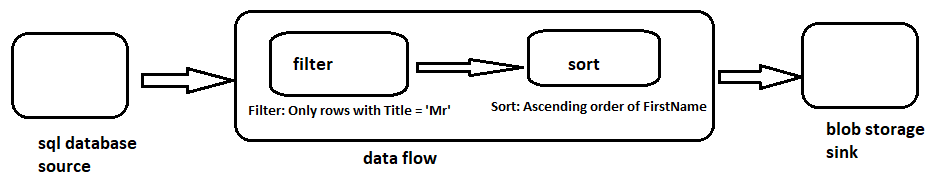

In [10]:
from IPython.display import Image
Image('./img/adf6.png')

📌 Objective:
To load data from a **SQL Database** to **Blob Storage** with **transformations**:
- Apply a **Filter** (Title = 'Mr')
- Apply **Sorting** (on `FirstName` in ascending order)
- Load the result into **Azure Blob Storage** in a structured format

🛠️ Recap: Copy Activity vs Transformation

| Feature | Copy Activity | Data Flow |
|--------|----------------|-------------|
| Purpose | Moves data from source to sink | Used for transformation logic |
| Transformation | ❌ Not possible | ✅ Supports multiple transformation types |
| Example | SQL ➝ Blob Storage | SQL ➝ Filter ➝ Sort ➝ Blob Storage |

🧩 Requirement Breakdown:

**Source:** Azure SQL Database  
**Sink (Target):** Azure Blob Storage (Delimited Text File)  
**Transformations Required:**
- Filter: Only rows with `Title = 'Mr'`
- Sort: Ascending order of `FirstName`

1. Open Azure Data Factory Studio
   - Navigate to **Data Flows**
   - Click on **+ New Data Flow**

2. Add a Source
    - Output stream name : `sd_source`
    - Create **Dataset** : new and Select **SQL Database** as source
    - Create a **Linked Service** (provide subscription, server, database, credentials)
    - Select **Table**: e.g., `SalesLT.Customer`
    - Data flow debug : Enable
    - Click **Data Preview** to inspect source data

3. Add `Filter` Transformation
    - Click on **+ ➝ Filter**
    - Output stream name : `filter_source`
    - **Incoming Stream**: sd_source
    - **Filter Condition** (Expression Builder):
        ```plaintext
        Title == 'Mr'
        ```
    - Click save and **Data Preview** to confirm filtering worked

4. Add `Sort` Transformation
    - Click on **+ ➝ Sort**
    - Output stream name : `sort_source`
    - **Incoming Stream**: filter_source
    - options : Case insensitive
    - **Sort Conditions**: `FirstName`
    - **Order**: Ascending
    - Preview to verify sorting (A ➝ Z)

5. Add Sink (Output)
    - Click on **+ ➝ Sink**
    - Output stream name : `sink_blob`
    - **Incoming Stream**: sort_source
    - Create **Dataset** : new and Select **blob storage ➝ Delimited Text** as source
    - Create/Select:
      - Linked service (Blob storage account)
      - File format (CSV, first row as header)
    - file path (e.g., `/dataflow_output/`)
    - Preview the output
      
6. Configure Partitioning (Optional but Recommended)
    - In **Sink ➝ Optimize Tab**:
    - Set **Sink Partitioning**:
        - **Single Partition** – to avoid multiple part files
        - Or customize as needed
 
7. Publish and Trigger Data Flow
    - Create a **Pipeline**
    - Drag and drop the **Data Flow**
    - Click **Publish All**
    - Click **Add Trigger ➝ Trigger Now**
    - Monitor execution in **Monitor ➝ Pipeline Runs**

8. Verify Output in Blob Storage
    - Go to Azure Blob Storage ➝ Navigate to output folder
    - Preview any CSV file:
    - Check filter: Only `Title = 'Mr'`
    - Check sort: Ordered by `FirstName` ascending

📌 Key Learnings:
- Data Flows allow **visual design** and **debugging** of transformations
- Can perform complex transformations (filter, join, aggregate, etc.)
- Option to preview data at each step
- Need to configure **partitioning** properly in sink to avoid fragmented output files

🔍 Common Transformation Activities in Data Flow:

| Transformation | Description |
|----------------|-------------|
| **Filter** | Row-level filtering |
| **Sort** | Order rows based on column |
| **Join** | Combine data from two streams |
| **Aggregate** | Group and summarize |
| **Derived Column** | Create new columns using expressions |
| **Conditional Split** | Route rows based on condition |


✅ Best Practices:
- Use **debug mode** to verify transformations step by step
- Always **preview** at each step
- Optimize sink partitioning to match downstream requirements

## 8. join transformation
- Requirement : we have two containers in storage account, employee and department. Employee container contains employee, related information is available as csv, and in department, department csv is available. We need to combine the csv and final information we have to save in the employee underscore department container. Create pipeline for that.

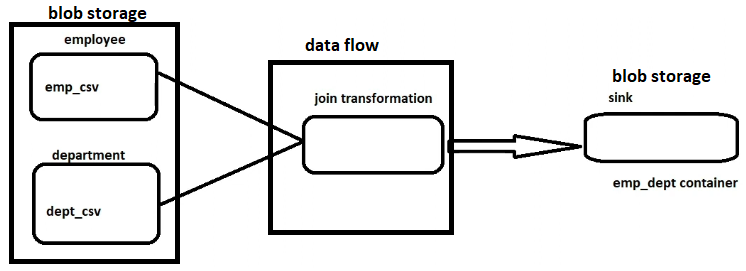

In [12]:
from IPython.display import Image
Image('./img/adf10.png')

1. Create Source Container and Upload File
    - Go to the **Azure Portal**.
    - Open your **Storage Account** (`covidreportingsa`) from the Dashboard or All Resources.
    - Navigate to `Storage browser` → `Blob containers`.
    - create a container `inputemp` and upload `emp_1.csv`
    - create a container `inputdept` and upload `department.csv`
    - click on file --> edit --> preview

2. create sink container 
    - create a container `empdept`

1. Open Azure Data Factory Studio
   - Navigate to **Data Flows**
   - Click on **+ New Data Flow**

2. Add a employee Source
    - Output stream name : `emp_source`
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_emp_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `inputemp/emp_1.csv`)

3. Add a department Source
    - Output stream name : `dept_source`
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_emp_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `inputdept/department.csv`)

> Data flow debug : Enable and Click `Data Preview` to inspect source data

4. Add `Join` Transformation
    - Click on **+ ➝ Join**
    - Output stream name : `join_sources`
    - left Stream : `emp_source`
    - right Stream : `dept_source`
    - Join Type  :`Left Outer`
    - JOin Conditions : Left Employees col :`emp_id` and  Right Departments col : `user`
    - Click save and **Data Preview** to confirm joining worked

5. Add Sink (Output)
    - Click on **+ ➝ Sink**
    - Output stream name : `sink_blob`
    - Incoming Stream: `join_sources`
    - Create **Dataset** : new and Select **blob storage ➝ Delimited Text** as source
    - Create/Select:
      - Linked service (Blob storage account)
      - File format (CSV, first row as header)
    - file path (e.g., `/empdept/`)
    - Preview the output

6. Publish and Trigger Data Flow
    - Create a **Pipeline**
    - Drag and drop the **Data Flow**
    - Click **Publish All**
    - Click **Add Trigger ➝ Trigger Now**
    - Monitor execution in **Monitor ➝ Pipeline Runs**

## 9. Union Transformation
- Requirement : we have two containers in storage account, mumbai and delhi. We need to combine the csv and final information we have to save in the output container. Create pipeline for that.
- whenever we want to combine column wise we use join
- we want to combine rows using union

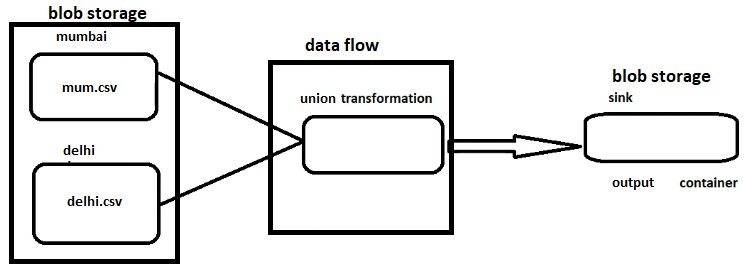

In [15]:
from IPython.display import Image
Image('./img/adf11.png')

- in storage account --> input container --> delhi.csv, mumbai.csv
- in storage account --> output container 

1. Open Azure Data Factory Studio
   - Navigate to **Data Flows**
   - Click on **+ New Data Flow**

2. Add a employee Source
    - Output stream name : `mum_source`
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_mum_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `input/mum.csv`)

3. Add a department Source
    - Output stream name : `delhi_source`
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_delhi_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `input/delhi.csv`)

> Data flow debug : Enable and Click `Data Preview` to inspect source data

4. Add `Union` Transformation
    - Click on **+ ➝ Join**
    - Output stream name : `union_sources`
    - incoming Stream : `mum_source`
    - union by  : `name`
    - union with  :`delhi_source`
    - Click save and **Data Preview** to confirm joining worked

5. Add Sink (Output)
    - Click on **+ ➝ Sink**
    - Output stream name : `sink_blob`
    - Incoming Stream: `join_sources`
    - Create **Dataset** : new and Select **blob storage ➝ Delimited Text** as source
    - Create/Select:
      - Linked service (Blob storage account)
      - File format (CSV, first row as header)
    - file path (e.g., `/output/`)
    - Preview the output

6. Publish and Trigger Data Flow
    - Create a **Pipeline**
    - Drag and drop the **Data Flow**
    - Click **Publish All**
    - Click **Add Trigger ➝ Trigger Now**
    - Monitor execution in **Monitor ➝ Pipeline Runs**

## 10. Select Transformation
- We use the Select Transformation to rename, drop, or reorder the columns. 
    - Drop :  Suppose we have 50+ column in source and we want only 20 columns in the target, so we can drop columns using SelectTransformation. 
    - Rename : If you want to rename any column name in source data, 
    - reorder : We can reorder columns which will come first and which will be last 
- Requirement : We have a data in azure storage as csv file. We need to copy in storage another container, but we want only limited columns. We want to rename the column, we have to reorder the column.

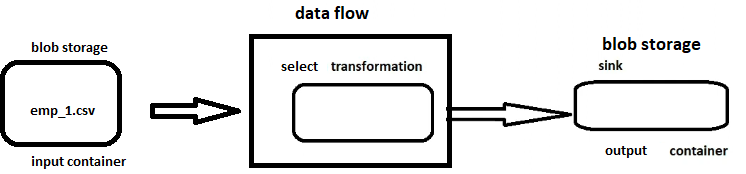

In [18]:
from IPython.display import Image
Image('./img/adf12.png')

- in storage account --> input container --> emp_1.csv
- in storage account --> output container 

1. Open Azure Data Factory Studio
   - Navigate to **Data Flows**
   - Click on **+ New Data Flow**

2. Add a employee Source
    - Output stream name : `emp_source`
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_emp_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `input/emp_1.csv`)

> Data flow debug : Enable and Click `Data Preview` to inspect source data

3. Add `Select` Transformation
    - Click on **+ ➝ Select**
    - Output stream name : `select_sources`
    - incoming Stream : `emp_source`
    - options  : skip duplicate input columns, skip duplicate output columns
    - input columns : emp_id as id, name as name, salarry as salary, address as address, loc as location, email as email_id(rename, reorder, drop can do here it self)
    - Click save and **Data Preview** to confirm joining worked

5. Add Sink (Output)
    - Click on **+ ➝ Sink**
    - Output stream name : `sink_blob`
    - Incoming Stream: `select_sources`
    - Create **Dataset** : new and Select **blob storage ➝ Delimited Text** as source
    - Create/Select:
      - Linked service (Blob storage account)
      - File format (CSV, first row as header)
    - file path (e.g., `/output/`)
    - Preview the output

6. Publish and Trigger Data Flow
    - Create a **Pipeline**
    - Drag and drop the **Data Flow**
    - Click **Publish All**
    - Click **Add Trigger ➝ Trigger Now**
    - Monitor execution in **Monitor ➝ Pipeline Runs**

## 12. Derived Transformation
- We can either generate a new column or update an existing one. 
- Example, suppose in our column any value is coming as blank and we want to modify as unknown. Suppose you want to add new column, that column you want to have in uppercase. You want to add new column, combination of 2, 3 column.

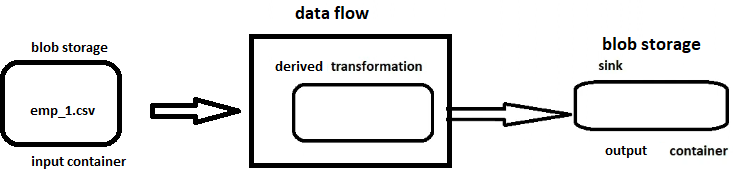

In [21]:
from IPython.display import Image
Image('./img/adf13.png')

- in storage account --> input container --> emp_1.csv
- in storage account --> output container 

1. Open Azure Data Factory Studio
   - Navigate to **Data Flows**
   - Click on **+ New Data Flow**

2. Add a employee Source
    - Output stream name : `emp_source`
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_emp_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `input/emp_1.csv`)
    - Projection : by default all datatypes are string if yiu want change you can
> Data flow debug : Enable and Click `Data Preview` to inspect source data

3. Add `Derived column` Transformation
    - Click on **+ ➝ Derived column**
    - Output stream name : `derived_sources`
    - incoming Stream : `emp_source`
    - columns : column : expression , 
                - name :  iif(isNull(name), 'unknown', name)
                - salary : iif(isNull(salary), '10000', salary)
                - Country : upper(address)
    - Click save and **Data Preview** to confirm joining worked

5. Add Sink (Output)
    - Click on **+ ➝ Sink**
    - Output stream name : `sink_blob`
    - Incoming Stream: `select_sources`
    - Create **Dataset** : new and Select **blob storage ➝ Delimited Text** as source
    - Create/Select:
      - Linked service (Blob storage account)
      - File format (CSV, first row as header)
    - file path (e.g., `/output/`)
    - Preview the output

6. Publish and Trigger Data Flow
    - Create a **Pipeline**
    - Drag and drop the **Data Flow**
    - Click **Publish All**
    - Click **Add Trigger ➝ Trigger Now**
    - Monitor execution in **Monitor ➝ Pipeline Runs**

## 13. Aggregate Transformation
- using the expression builder you can define different types of aggregations such as sum, min, max and count grouped by existing or computed

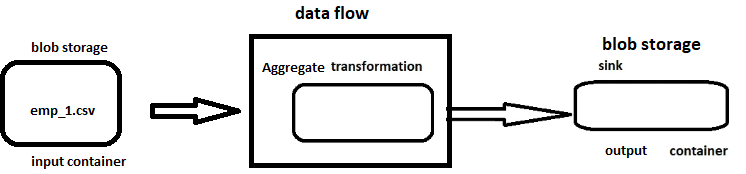

In [23]:
from IPython.display import Image
Image('./img/adf14.png')

1. Open Azure Data Factory Studio
   - Navigate to **Data Flows**
   - Click on **+ New Data Flow**

2. Add a employee Source
    - Output stream name : `emp_source`
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_emp_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `input/emp_1.csv`)
    - Projection : by default all datatypes are string if yiu want change you can

> Data flow debug : Enable and Click `Data Preview` to inspect source data

3. Add `Aggregate` Transformation
    - Click on **+ ➝ Aggregate**
    - Output stream name : `Aggregate_sources`
    - incoming Stream : `emp_source`
    - group by : `address`
    - Aggregate : expression, emp_count  : countDistinct(emp_id), total_salary : sum(salary), max_salary : max(salary)
    - Click save and **Data Preview** to confirm joining worked

5. Add Sink (Output)
    - Click on **+ ➝ Sink**
    - Output stream name : `sink_blob`
    - Incoming Stream: `select_sources`
    - Create **Dataset** : new and Select **blob storage ➝ Delimited Text** as source
    - Create/Select:
      - Linked service (Blob storage account)
      - File format (CSV, first row as header)
    - file path (e.g., `/output/`)
    - Preview the output

6. Publish and Trigger Data Flow
    - Create a **Pipeline**
    - Drag and drop the **Data Flow**
    - Click **Publish All**
    - Click **Add Trigger ➝ Trigger Now**
    - Monitor execution in **Monitor ➝ Pipeline Runs**

## 14. Paramaterization dataset
- Parameterization process of dynamic pass values during runtime to avoid duplicate tasks. 
- Suppose I have one table in my SQL database and I want to move the data to blob storage. I will create source dataset and I will pass the table name and I will copy data into blob storage.
- Suppose I have 100 tables and I want to copy that into blob storage. Will you create 100 pipelines and pass different table name to dataset? To avoid this, we have a concept of parameterization.

In [1]:
from IPython.display import Image
Image('./img/adf15.png')

FileNotFoundError: No such file or directory: './img/adf15.png'

FileNotFoundError: No such file or directory: './img/adf15.png'

<IPython.core.display.Image object>

1. Open Azure Data Factory Studio
   - Navigate to **Datasets**
   - Click on **+ New Dataset** : `ds_Azuresql`  and Select **Sql  databse ➝ continue
   - Create a **Linked Service** : `ls_sql_source`  (provide subscription, server name, database name, sql autentication, uname, password ) --> click on create 
   - table name : `i will parameterized this value`
   - click on `ok`
   - parameters : Name: table_name,
   - connection tab : Enter manually
   - table : schema  : SalesLT, table :` @dataset().table_name`
   - click on `preview data`
       

## Paramterized -- linked Service
- we can pass the dynamic value in linked service
- ex: suppose i have 2-3 sqlserver  and we have multiple db name available so instead of creating multiple linked service we can create one

1. Open Azure Data Factory Studio
   - Navigate to **Manage** --> linked service
   - Click on **+ New**  and Select **Sql  databse ➝ continue
   - Create a **Linked Service** : `ls_sql_source`  
   - Account selection method : Enter Manually
   - Fully qualified domain name  : `myserver.database.windows.net`
   - provide subscription, server name,  sql autentication, uname, password ) 
   - Database name : Add dynamic content  `@linkedService().db_name`
   - parameter : name: `db_name`, 
   - click on `ok`
   - click on `preview data`
       

## Pipeline parameterization in azure data factory

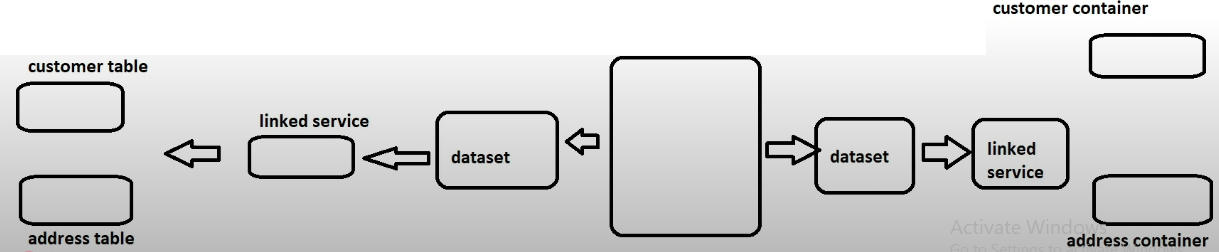

In [4]:
from IPython.display import Image
Image('./img/adf16.png')

- go to blob storage --> create 2 containers address, customer

1. Open Azure Data Factory Studio
    - Navigate to **Pipelines**
    - Click on **+ New pipeline**
    - drag the `copy activity` into canvas

2. Source
    - name : `sd_source`
    - Click on **+ New Dataset** : `ds_Azuresql` and Select **SQL Database** as source
    - Create a **Linked Service** : `ls_sql_source`(provide subscription, server, database, credentials)
    - Select **Table**: `paramterized this value`
    - click on `ok`
    - Navigate to **Datasets**
    - Click on created dataset **ds_Azuresql**
    - parameters : Name: table_name,
    - connection tab : Enter manually
    - table : schema  : SalesLT, table :` @dataset().table_name`
    - click on `preview data`
       
3. click on white space in canvas
    - Parameters  --> name : `table_name`
  
4. Click on copy acctivity
    - Source tab : Dataset Properties : table_name : `@pipeline().parameters.table_name`
  

5. Sink tab(Output)
    - Click on **+ ➝ Sink**
    - sink dataset :  Create **new Dataset** :`ds_blob` new and Select **blob storage ➝ Delimited Text** as source
    - Create a **Linked Service** : `ls_blob_sink`(provide subscription, storage account)
    - file path : parameterised the container name
    - Navigate to **Datasets**
    - Click on created dataset **ds_blob**
    - parameters : Name: container_name,
    - connection tab : filepath: add dynamic content `@dataset().container_name`
    - click on `preview data`


6. click on white space in canvas
    - Parameters  --> name : `container_name`
  
7. Click on copy acctivity
    - Source tab : Dataset Properties : container_name : `@pipeline().parameters.container_name`
  

8. Configure Partitioning (Optional but Recommended)
    - In **Sink ➝ Optimize Tab**:
    - Set **Sink Partitioning**:
        - **Single Partition** – to avoid multiple part files
        - Or customize as needed
 
9. Publish and Trigger 
    - Click **Publish All**
    - Click **Add Trigger ➝ Trigger Now**
    - Monitor execution in **Monitor ➝ Pipeline Runs**

## How to save the output file with proper file name format

##### Step 1. Create Source Container and Upload File
1. Go to the **Azure Portal**.
2. Open your **Storage Account** (`covidreportingsa`) from the Dashboard or All Resources.
3. Navigate to `Storage browser` → `Blob containers`.
4. Click **+ Container**, name it `inputcsv`, and set access level to `Private`.
5. Click into the container `inputcsv` and click **Upload**.
6. Browse and upload the file `emp_1.csv`.
7. click on file --> edit --> preview

##### 2. Create Sink Container (blob storage)
1. Go back to Dashboard → Open your Data Lake Storage Account (`covidreportingdl`).
2. Navigate to `Storage browser` → `Blob containers`.
3. Click **+ Container**, name it `outputjson`.
4. Set access level to `Private` and click **Create**.

##### 3. Create a New Pipeline
- Go to **Author** tab in ADF Studio.
- Click on the three dots next to Pipelines → **New Pipeline**.
- On the right, name your pipeline and provide an optional description.
- Set **Concurrency** to `1` (or more if parallel runs are needed).

##### 4. Add a Copy Data Activity
- Expand **Move & Transform** in the Activities pane.
- Drag **Copy data** to the central canvas.

4.1 General
- Select the activity to configure: 
- Name the activity (e.g., `CopyRawToLake`).
- Set timeout to `5 minutes`.
- Retry: `0` (or higher with interval).
- Secure Output/Input: Enable if sensitive data is involved.

4.2 Source Dataset (Blob Storage)
- Format: DelimitedText
- Name: `ds_input_data`
- Linked Service: `ls_ablob_inputdata`, select subscription, storage account name --> Test Connection
- File Path: `/inputcsv/emp_1.csv`
- First row as header: Enabled
- click on ok

4.3 Sink Dataset (blob storage)
- Format: json
- Name: `ds_output_data`
- Linked Service: `ls_ablob_outdata` , select subscription, storage account name --> Test Connection
- File Path: `/outputjson/
- First row as header: Enabled
- click on ok
- Sink dataset : open --> file path : add dynamic content --> functions --> `@convertTimeZone(utcnow(), 'UTC', 'India Standard Time')`

##### 5: Validate and Publish
##### Validate Objects
Click on **Validate All** to check for issues in Linked Services or Datasets.

##### Publish Changes
Click on **Publish All** to save changes to the Data Factory.
Until you publish, your datasets and pipelines exist only temporarily in the UI.

<b>run pipeline : </b>

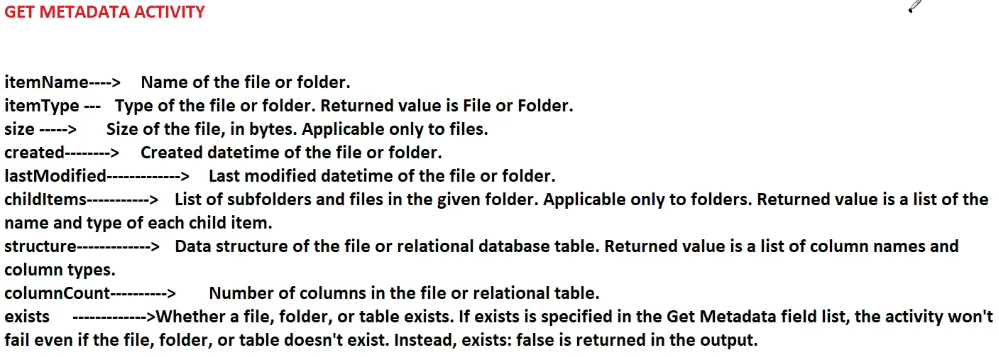

In [6]:
from IPython.display import Image
Image('./img/adf17.png')

1. Open Azure Data Factory Studio
    - Navigate to **Pipelines**
    - Click on **+ New Pipelines**
    - drag the `Get Metadata` into canvas

2. settings tab
    - Create **Dataset** : new and Select **blob storage** as source and select delimited text
    - Create a **Linked Service** : `ls_blob_source`  (provide subscription, storage account ) --> click on create
    - file path (e.g., `input/`)
    - field list : child item

#### 27. Set Variable Activity(General) in ADF
- To set the value of an existing variable of type String, Bool or Array defined in a Data Factory pipeline

In [2]:
a = 10

<b>Method 1 : from the set variable activity</b>
- create a new pipeline
- drag a **Set Variable activity** from General into canvas
- In the Set Variable activity:
- **General tab**
    - Name: setdate 
- **Setting tab**
    - Variable type: Pipeline variable
    - Name         :  click on **+ New** --> Add New Variable Name: `date`, Type: String
    - Value        : @utcnow()
- Click on the debug

<b>Method 2 : from the pipeline variable</b>
- create a new pipeline
- go to **Variables tab** Name: `day`, Type: String
- In the Set Variable activity:
- **General tab**
    - Name: setdate 
- **Setting tab**
    - Variable type: Pipeline variable
    - Name         :  `day`
    - Value        : @dayoftheweek()
- Click on the debug

<b>concat these two values and create another variable</b>
- drag another set variable
- Name : Filename
- value : @concat(variables('date'), variables('day'))

<b>Scenario:</b> if i hit the Api endpoint url  : https://api.prod.wisetaillms.net/openai/v1/token  
i will get the below json:
```json
{
  "token_type": "Bearer",
  "expires_in": 90000,
  "access_token": "eyJ0eXAiOiJKV1QiLCJh..."
}
```
Now i want to store access_token value in a variable

<b>Store Token in Variable</b>
- Add a **Set Variable activity** from General after GetToken web activity.
- Create a pipeline variable named accessToken (String).
- In the Set Variable activity:
- **General tab**
    - Name: setaccessToken
- **Setting tab**
    - Variable type: Pipeline variable
    - Name         : accessToken
    - Value        : @activity('GetToken').output.access_token

#### 35. Until activity(Iteration and Conditionals) in ADF
- The until activity provides the same functionality that a do-while looping structure provides in programming languages
- it executes a set of activities in a loop until the condition associated with the activity evaluates to true

- create a pipeline and go to **Variables tab** Name: `fileexists`, Type: String, Deafult : False
- drag and drop the **Until** into canvas
- **General tab**
- **Settings tab**
    - expression : @bool(variables('fileexists'))
    - timeout : 0.00:02:00
- to test i will add **Get Metadata** inside the **Until**